In [3]:
import pandas as pd

In [2]:
df = pd.read_csv('./data/vehicle_prod.csv')
df

Unnamed: 0   2007   2008   2009   2010   2011
0      China   7.71   7.95  11.96  15.84  16.33
1         EU  19.02  17.71  15.00  16.70  17.48
2         US  10.47   8.45   5.58   7.60   8.40
3      Japan  10.87  10.83   7.55   9.09   7.88
4      Korea   4.04   3.78   3.45   4.20   4.62
5     Mexico   2.01   2.05   1.50   2.25   2.54

In [10]:
df1 = df.rename(columns={'Unnamed: 0':'country'})
df1

country   2007   2008   2009   2010   2011
0   China   7.71   7.95  11.96  15.84  16.33
1      EU  19.02  17.71  15.00  16.70  17.48
2      US  10.47   8.45   5.58   7.60   8.40
3   Japan  10.87  10.83   7.55   9.09   7.88
4   Korea   4.04   3.78   3.45   4.20   4.62
5  Mexico   2.01   2.05   1.50   2.25   2.54

In [11]:
df1.set_index('country', inplace=True)
df1

2007   2008   2009   2010   2011
country                                   
China     7.71   7.95  11.96  15.84  16.33
EU       19.02  17.71  15.00  16.70  17.48
US       10.47   8.45   5.58   7.60   8.40
Japan    10.87  10.83   7.55   9.09   7.88
Korea     4.04   3.78   3.45   4.20   4.62
Mexico    2.01   2.05   1.50   2.25   2.54

In [14]:
#국가명 컬럼으로 인덱스 설정하고 데이터프레임 생성
df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
df

2007   2008   2009   2010   2011
China    7.71   7.95  11.96  15.84  16.33
EU      19.02  17.71  15.00  16.70  17.48
US      10.47   8.45   5.58   7.60   8.40
Japan   10.87  10.83   7.55   9.09   7.88
Korea    4.04   3.78   3.45   4.20   4.62
Mexico   2.01   2.05   1.50   2.25   2.54

In [15]:
df['2007']

China      7.71
EU        19.02
US        10.47
Japan     10.87
Korea      4.04
Mexico     2.01
Name: 2007, dtype: float64

In [16]:
df[['2007']]

2007
China    7.71
EU      19.02
US      10.47
Japan   10.87
Korea    4.04
Mexico   2.01

In [18]:
df.columns.tolist()

['2007', '2008', '2009', '2010', '2011']

In [19]:
df['2007'].tolist()

[7.71, 19.02, 10.47, 10.87, 4.04, 2.01]

In [20]:
df.describe()

2007       2008       2009       2010       2011
count   6.000000   6.000000   6.000000   6.000000   6.000000
mean    9.020000   8.461667   7.506667   9.280000   9.541667
std     6.019661   5.557519   5.142621   5.935921   6.105887
min     2.010000   2.050000   1.500000   2.250000   2.540000
25%     4.957500   4.822500   3.982500   5.050000   5.435000
50%     9.090000   8.200000   6.565000   8.345000   8.140000
75%    10.770000  10.235000  10.857500  14.152500  14.347500
max    19.020000  17.710000  15.000000  16.700000  17.480000

#상관분석은 

#상관관계
변수들간의 값의 변화의 유사도, 
- 음의상관: 서로 반대 방향으로 변화, 증가>감소, 감소>증가
- 양의상관: 서로 같은 방향으로 변화, 증가>증가, 감소>감소

In [21]:
df.corr()

2007      2008      2009      2010      2011
2007  1.000000  0.991073  0.831447  0.769040  0.758271
2008  0.991073  1.000000  0.872296  0.810529  0.789512
2009  0.831447  0.872296  1.000000  0.988513  0.980025
2010  0.769040  0.810529  0.988513  1.000000  0.992667
2011  0.758271  0.789512  0.980025  0.992667  1.000000

In [27]:
df.sum(axis=1, numeric_only=True)

China     119.58
EU        171.82
US         81.00
Japan      92.44
Korea      40.18
Mexico     20.70
dtype: float64

In [26]:
# 2007~2011 년까지의 생산량을 합한 total_production 컬럼을 생성해보자
df['total_production'] = df.sum(axis=1, numeric_only=True)
df

2007   2008   2009   2010   2011  total_production
China    7.71   7.95  11.96  15.84  16.33             59.79
EU      19.02  17.71  15.00  16.70  17.48             85.91
US      10.47   8.45   5.58   7.60   8.40             40.50
Japan   10.87  10.83   7.55   9.09   7.88             46.22
Korea    4.04   3.78   3.45   4.20   4.62             20.09
Mexico   2.01   2.05   1.50   2.25   2.54             10.35

In [28]:
#total 행으로 추가
df.loc['total'] = df.sum( numeric_only=True)

In [ ]:
df

2007   2008   2009   2010   2011  total_production
China    7.71   7.95  11.96  15.84  16.33             59.79
EU      19.02  17.71  15.00  16.70  17.48             85.91
US      10.47   8.45   5.58   7.60   8.40             40.50
Japan   10.87  10.83   7.55   9.09   7.88             46.22
Korea    4.04   3.78   3.45   4.20   4.62             20.09
Mexico   2.01   2.05   1.50   2.25   2.54             10.35
total   54.12  50.77  45.04  55.68  57.25            262.86

In [34]:
# 시리즈 생성
month_se = pd.Series(['1월', '2월', '3월', '4월'])
income_se = pd.Series([9500, 6200, 6050, 7000])
expenses_se = pd.Series([5040, 2350, 2300, 4800])

# 데이터프레임 생성
store_df = pd.DataFrame({
    '월': month_se,
    '수입': income_se,
    '지출': expenses_se, 
})

#순수입 컬럼 추가하기

In [37]:
store_df['순수입'] = store_df['수입'] - store_df['지출']
store_df

월    수입    지출   순수입
0  1월  9500  5040  4460
1  2월  6200  2350  3850
2  3월  6050  2300  3750
3  4월  7000  4800  2200

In [38]:
store_df.loc['총 수입'] = store_df.sum(numeric_only=True)
store_df

월       수입       지출      순수입
0      1월   9500.0   5040.0   4460.0
1      2월   6200.0   2350.0   3850.0
2      3월   6050.0   2300.0   3750.0
3      4월   7000.0   4800.0   2200.0
총 수입  NaN  28750.0  14490.0  14260.0

# 시각화

In [29]:
df = pd.read_csv('./data/vehicle_prod.csv', index_col=0)
df

2007   2008   2009   2010   2011
China    7.71   7.95  11.96  15.84  16.33
EU      19.02  17.71  15.00  16.70  17.48
US      10.47   8.45   5.58   7.60   8.40
Japan   10.87  10.83   7.55   9.09   7.88
Korea    4.04   3.78   3.45   4.20   4.62
Mexico   2.01   2.05   1.50   2.25   2.54

<Axes: >

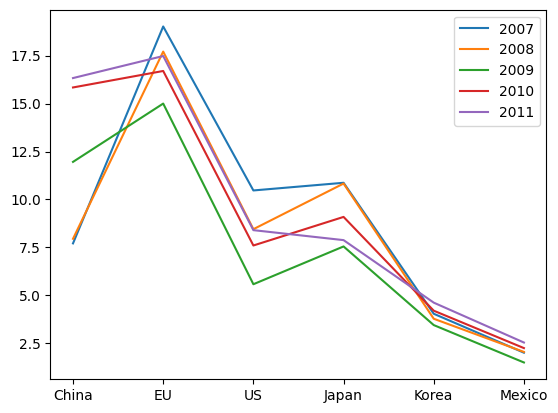

In [20]:
df.plot.line()

Text(0, 0.5, 'Production')

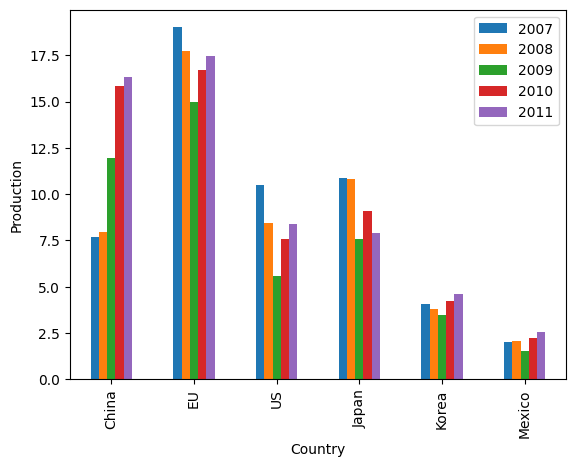

In [27]:
ax = df.plot.bar()
ax.set_xlabel('Country')
ax.set_ylabel('Production')

<Axes: >

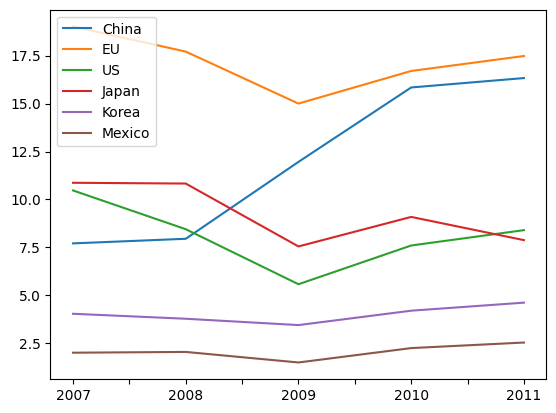

In [31]:
df_year = df.transpose() # X_label(country)랑 Y)label(year)을 바꿔버림.
df_year.plot.line()

# 결측치 npp.nan, pd.NA

In [ ]:
import numpy as np
np.nan == 0  # nan 0 아님

False

In [ ]:
x = [1, 2, np.nan, 4] # nan 결측치
x 

[1, 2, nan, 4]

In [45]:
import pandas as pd
pd.NA # NaN
pd.isna(x)

array([False, False,  True, False])

In [46]:
pd.NA == np.nan

<NA>

In [47]:
pd.isnull(np.nan)

True

In [162]:
import pandas as pd
import numpy as np

data = {
    'name': ['Alice', 'Bob', 'Charlie', 'David', 'Eva'],
    'age': [25, np.nan, 30, 22, np.nan],
    'score': [90, 85, np.nan, 88, 95],
    'city': ['Seoul', 'Busan', np.nan, 'Incheon', 'Seoul']
}

df = pd.DataFrame(data)

In [55]:
df

name   age  score     city
0    Alice  25.0   90.0    Seoul
1      Bob   NaN   85.0    Busan
2  Charlie  30.0    NaN      NaN
3    David  22.0   88.0  Incheon
4      Eva   NaN   95.0    Seoul

In [ ]:
# 결측치 갯수 확인
df.isnull() # pd.isnull(df)

name    age  score   city
0  False  False  False  False
1  False   True  False  False
2  False  False   True   True
3  False  False  False  False
4  False   True  False  False

In [ ]:
df.isnull().sum() # 갯수 확인

name     0
age      2
score    1
city     1
dtype: int64

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    5 non-null      object 
 1   age     3 non-null      float64
 2   score   4 non-null      float64
 3   city    4 non-null      object 
dtypes: float64(2), object(2)
memory usage: 292.0+ bytes


In [60]:
# 결측치 제거
df.dropna() # 행전체 제거

name   age  score     city
0  Alice  25.0   90.0    Seoul
3  David  22.0   88.0  Incheon

In [ ]:
df.dropna(axis = 1) # 열전체 제거

name
0    Alice
1      Bob
2  Charlie
3    David
4      Eva

In [ ]:
df.dropna(subset=['score']) # dropna(subset=['']) score가 NaN인 값 삭제 
# 해당컬럼의 na가 있는 행을 삭제

name   age  score     city
0  Alice  25.0   90.0    Seoul
1    Bob   NaN   85.0    Busan
3  David  22.0   88.0  Incheon
4    Eva   NaN   95.0    Seoul

In [67]:
df.dropna(subset=['age'])

name   age  score     city
0    Alice  25.0   90.0    Seoul
2  Charlie  30.0    NaN      NaN
3    David  22.0   88.0  Incheon

# 채우기

In [70]:
df['age'].fillna(0)

0    25.0
1     0.0
2    30.0
3    22.0
4     0.0
Name: age, dtype: float64

In [71]:
df

name   age  score     city
0    Alice  25.0   90.0    Seoul
1      Bob   NaN   85.0    Busan
2  Charlie  30.0    NaN      NaN
3    David  22.0   88.0  Incheon
4      Eva   NaN   95.0    Seoul

## 수치향 변수의 경우는 대표값 : 평균, 중앙값, 최빈값

In [81]:
df['age']

0    25.0
1     NaN
2    30.0
3    22.0
4     NaN
Name: age, dtype: float64

#### 평균

In [72]:
df['age'].fillna(df['age'].mean())

0    25.000000
1    25.666667
2    30.000000
3    22.000000
4    25.666667
Name: age, dtype: float64

In [73]:
df['age'].mean() # 평균

np.float64(25.666666666666668)

#### 중앙값


In [74]:
df['age'].fillna(df['age'].median())

0    25.0
1    25.0
2    30.0
3    22.0
4    25.0
Name: age, dtype: float64

In [75]:
df['age'].median() # 중앙값

np.float64(25.0)

#### 최빈값

In [85]:
df['age'].mode()

0    22.0
1    25.0
2    30.0
Name: age, dtype: float64

In [82]:
df['age'].mode().iloc[0] # 최빈값

np.float64(22.0)

In [ ]:
df['age'].fillna(df['age'].mode().iloc[0])

0    25.0
1    25.0
2    30.0
3    22.0
4     NaN
Name: age, dtype: float64

####  직전값 , 직후값 fill


In [171]:
df['score']

0    90.0
1    85.0
2     NaN
3    88.0
4    95.0
Name: score, dtype: float64

In [88]:
# 직전 값으로 채우기
df['score'].ffill()

0    90.0
1    85.0
2    85.0
3    88.0
4    95.0
Name: score, dtype: float64

In [89]:
# 직후 값으로 채우기
df['score'].bfill()

0    90.0
1    85.0
2    88.0
3    88.0
4    95.0
Name: score, dtype: float64

In [91]:
df['age'].mask(df['age'] < 30, 30) # 컬럼의 값에 따라 조건을 주어, 대체할 때 사용

0    30.0
1     NaN
2    30.0
3    30.0
4     NaN
Name: age, dtype: float64

In [93]:
titanic_df = pd.read_csv('./data/titanic.csv')
titanic_df.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [95]:
titanic_df.info

<bound method DataFrame.info of      PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                   

In [94]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
# 결측치가 있는 칼럼 확인
pd.isna(titanic_df).sum() # titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [ ]:
titanic_df['Age'].mean() # 평균

np.float64(29.69911764705882)

In [ ]:
titanic_df['Age'].median() 

np.float64(28.0)

In [105]:
titanic_df['Age'].fillna(titanic_df['Age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [106]:
titanic_df['Age'].fillna(titanic_df['Age'].median()).mean()

np.float64(29.36158249158249)

<Axes: ylabel='Frequency'>

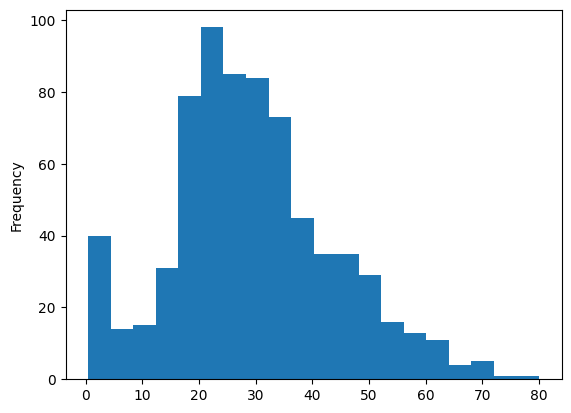

In [112]:
titanic_df['Age'].plot(kind='hist', bins =20) # 막대기 간격 [bins]

In [113]:
# Cabin
titanic_df['Cabin'].fillna('모름')

0        모름
1       C85
2        모름
3      C123
4        모름
       ... 
886      모름
887     B42
888      모름
889    C148
890      모름
Name: Cabin, Length: 891, dtype: object

In [116]:
titanic_df['Cabin'].value_counts().head(5)

Cabin
G6             4
C23 C25 C27    4
B96 B98        4
F2             3
D              3
Name: count, dtype: int64

In [121]:
# Embarked 의 최빈값으로 채우기
titanic_df['Embarked'].value_counts().head()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [122]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode())

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

In [124]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [125]:
titanic_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

# 전처리 연습

In [223]:
df = pd.read_csv('./data/CARD_SUBWAY_MONTH_202102.csv', index_col= False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16751 entries, 0 to 16750
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   사용일자    16751 non-null  int64 
 1   노선명     16751 non-null  object
 2   역명      16751 non-null  object
 3   승차총승객수  16751 non-null  int64 
 4   하차총승객수  16751 non-null  int64 
 5   등록일자    16751 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 785.3+ KB


In [224]:
df.head()

사용일자  노선명   역명  승차총승객수  하차총승객수      등록일자
0  20210201  중앙선   용문    1282    1259  20210204
1  20210201  중앙선   지평      48      43  20210204
2  20210201  중앙선   아신     415     413  20210204
3  20210201  중앙선   양수    1463    1466  20210204
4  20210201  중앙선  운길산     495     463  20210204

In [225]:
df.tail()

사용일자  노선명  역명  승차총승객수  하차총승객수      등록일자
16746  20210228  중앙선  오빈     216     236  20210303
16747  20210228  중앙선  양평    3299    3187  20210303
16748  20210228  중앙선  원덕     322     304  20210303
16749  20210228  중앙선  용문    1899    1716  20210303
16750  20210228  중앙선  지평      30      31  20210303

In [226]:
#총몇건인지 코드로 확인
len(df)

16751

In [227]:
#평균, 표준편차, 사분위수 등 주요 통계 지표를 확인하세요
df.describe

<bound method NDFrame.describe of            사용일자  노선명   역명  승차총승객수  하차총승객수      등록일자
0      20210201  중앙선   용문    1282    1259  20210204
1      20210201  중앙선   지평      48      43  20210204
2      20210201  중앙선   아신     415     413  20210204
3      20210201  중앙선   양수    1463    1466  20210204
4      20210201  중앙선  운길산     495     463  20210204
...         ...  ...  ...     ...     ...       ...
16746  20210228  중앙선   오빈     216     236  20210303
16747  20210228  중앙선   양평    3299    3187  20210303
16748  20210228  중앙선   원덕     322     304  20210303
16749  20210228  중앙선   용문    1899    1716  20210303
16750  20210228  중앙선   지평      30      31  20210303

[16751 rows x 6 columns]>

In [228]:
#몇 개의 컬럼이 있는지, 각 컬럼에 포함된 데이터들의 타입은 무엇인지 확인해보세요.
df.columns.tolist(), df.dtypes

(['사용일자', '노선명', '역명', '승차총승객수', '하차총승객수', '등록일자'],
 사용일자       int64
 노선명       object
 역명        object
 승차총승객수     int64
 하차총승객수     int64
 등록일자       int64
 dtype: object)

In [229]:
#‘노선명’ 컬럼이 가지고 있는 데이터의 종류를 확인하세요
df['노선명'].unique()

array(['중앙선', '장항선', '일산선', '우이신설선', '안산선', '수인선', '분당선', '과천선',
       '공항철도 1호선', '경춘선', '경인선', '경의선', '경원선', '경부선', '경강선', '9호선2~3단계',
       '9호선', '8호선', '7호선', '6호선', '5호선', '4호선', '3호선', '2호선', '1호선'],
      dtype=object)

In [182]:
df['노선명'].value_counts()

노선명
5호선         1484
7호선         1428
2호선         1400
경부선         1092
6호선         1051
분당선          967
3호선          937
경원선          821
경의선          737
4호선          728
9호선          700
중앙선          588
경인선          560
경춘선          532
수인선          504
8호선          476
공항철도 1호선     392
안산선          364
9호선2~3단계     364
우이신설선        364
경강선          308
일산선          282
1호선          280
과천선          224
장항선          168
Name: count, dtype: int64

# ‘승차총승객수’ 컬럼을 기준으로 데이터를 정렬하세요

#.sort_values()

In [206]:
#‘2호선’만 선택하세요.
df_2 = df[df['노선명'] == '2호선']
df_2

사용일자  노선명         역명  승차총승객수  하차총승객수      등록일자
532    20210201  2호선  용두(동대문구청)    2365    2430  20210204
533    20210201  2호선      신정네거리    9269    9599  20210204
534    20210201  2호선       양천구청    6318    6738  20210204
535    20210201  2호선        도림천    1434    1469  20210204
536    20210201  2호선        신설동    3046    3110  20210204
...         ...  ...        ...     ...     ...       ...
16207  20210228  2호선        신설동    2806    2830  20210303
16208  20210228  2호선        도림천     480     477  20210303
16209  20210228  2호선       양천구청    3234    3281  20210303
16210  20210228  2호선      신정네거리    4814    4805  20210303
16211  20210228  2호선  용두(동대문구청)    1069    1029  20210303

[1400 rows x 6 columns]

In [184]:
# ‘승차총승객수가’이 50000명 이상인 로우의 ‘역명’을 확인하세요.
df[df['승차총승객수'] > 50000]['역명'].unique()

array(['구로디지털단지', '신림', '강남', '선릉', '잠실(송파구청)', '역삼', '홍대입구', '삼성(무역센터)'],
      dtype=object)

In [231]:
# ‘등록일자’ 컬럼을 삭제하세요
df1 = df.drop(['등록일자'], axis=1)
df1

사용일자  노선명   역명  승차총승객수  하차총승객수
0      20210201  중앙선   용문    1282    1259
1      20210201  중앙선   지평      48      43
2      20210201  중앙선   아신     415     413
3      20210201  중앙선   양수    1463    1466
4      20210201  중앙선  운길산     495     463
...         ...  ...  ...     ...     ...
16746  20210228  중앙선   오빈     216     236
16747  20210228  중앙선   양평    3299    3187
16748  20210228  중앙선   원덕     322     304
16749  20210228  중앙선   용문    1899    1716
16750  20210228  중앙선   지평      30      31

[16751 rows x 5 columns]

In [244]:
#'승차총승객수’와 ‘하차총승객수’ 컬럼의 차이를 계산한 ‘승하차총승객수차이’ 컬럼을 생성하세요.
df['승하차총승객수차이'] = df['하차총승객수'] - df['승차총승객수']
df

사용일자  노선명   역명  승차총승객수  하차총승객수      등록일자  승하차총승객수차이
0      20210201  중앙선   용문    1282    1259  20210204        -23
1      20210201  중앙선   지평      48      43  20210204         -5
2      20210201  중앙선   아신     415     413  20210204         -2
3      20210201  중앙선   양수    1463    1466  20210204          3
4      20210201  중앙선  운길산     495     463  20210204        -32
...         ...  ...  ...     ...     ...       ...        ...
16746  20210228  중앙선   오빈     216     236  20210303         20
16747  20210228  중앙선   양평    3299    3187  20210303       -112
16748  20210228  중앙선   원덕     322     304  20210303        -18
16749  20210228  중앙선   용문    1899    1716  20210303       -183
16750  20210228  중앙선   지평      30      31  20210303          1

[16751 rows x 7 columns]

In [245]:
#‘승하차총승객수차이’의 평균값을 계산하세요
df['승하차총승객수차이'].mean()

np.float64(-30.870276401408873)

In [210]:
# 전체 중 10개의 아이템을 샘플링해서 데이터프레임을 생성하세요.
#.sample()
sample_df= df.sample(n= 10)

sample_df

사용일자       노선명      역명  승차총승객수  하차총승객수      등록일자  승하차총승객수차이
8079   20210214       7호선  신대방삼거리    5761    6403  20210217        642
7876   20210214       경춘선    평내호평    2771    2528  20210217       -243
14039  20210224  9호선2~3단계   종합운동장    4080    4040  20210227        -40
13623  20210223       4호선      사당   23174   19167  20210226      -4007
3455   20210206  공항철도 1호선      검암    3643    3665  20210209         22
488    20210201       4호선     충무로   24144   25004  20210204        860
899    20210202       9호선   고속터미널    9655   12127  20210205       2472
10156  20210217     우이신설선      화계    2870    2750  20210220       -120
13526  20210223       7호선      장암    2312     870  20210226      -1442
2114   20210204       7호선      먹골    9584    9391  20210207       -193

In [211]:
type(sample_df)

pandas.core.frame.DataFrame

In [212]:
#sample_df의 ‘노선명’ 컬럼의 값이 1호선, 2호선, 3호선 4호선을 영어(line1, line2, line3, line4)로 변경하세요
sample_df['노선명'] = sample_df['노선명'].replace({
    '1호선': 'Line1',
    '2호선': 'Line2',
    '3호선': 'Line3',
    '4호선': 'Line4'
})

sample_df

사용일자       노선명      역명  승차총승객수  하차총승객수      등록일자  승하차총승객수차이
8079   20210214       7호선  신대방삼거리    5761    6403  20210217        642
7876   20210214       경춘선    평내호평    2771    2528  20210217       -243
14039  20210224  9호선2~3단계   종합운동장    4080    4040  20210227        -40
13623  20210223     Line4      사당   23174   19167  20210226      -4007
3455   20210206  공항철도 1호선      검암    3643    3665  20210209         22
488    20210201     Line4     충무로   24144   25004  20210204        860
899    20210202       9호선   고속터미널    9655   12127  20210205       2472
10156  20210217     우이신설선      화계    2870    2750  20210220       -120
13526  20210223       7호선      장암    2312     870  20210226      -1442
2114   20210204       7호선      먹골    9584    9391  20210207       -193

In [213]:
# 인덱스를 '사용일자'로 바꾸어 설정
df2 = df.set_index('사용일자')
df2

노선명   역명  승차총승객수  하차총승객수      등록일자  승하차총승객수차이
사용일자                                                   
20210201  중앙선   용문    1282    1259  20210204        -23
20210201  중앙선   지평      48      43  20210204         -5
20210201  중앙선   아신     415     413  20210204         -2
20210201  중앙선   양수    1463    1466  20210204          3
20210201  중앙선  운길산     495     463  20210204        -32
...       ...  ...     ...     ...       ...        ...
20210228  중앙선   오빈     216     236  20210303         20
20210228  중앙선   양평    3299    3187  20210303       -112
20210228  중앙선   원덕     322     304  20210303        -18
20210228  중앙선   용문    1899    1716  20210303       -183
20210228  중앙선   지평      30      31  20210303          1

[16751 rows x 6 columns]

In [214]:
# '사용일자' 컬럼을 연도.월.일(예: 2021-02-01)의 형태로 표시되도록 수정하세요/
# UDF 정의 getDate(data)

def getDate(data):
    dt = str(data)
    yy = dt[0:4]
    mm = dt[4:6]
    dd = dt[6:8]
    return yy+'-'+mm+'-'+dd

d = '20210303'
getDate(d)

'2021-03-03'

In [233]:
df1['사용일자'] = df1['사용일자'].apply(getDate)
df1

사용일자  노선명   역명  승차총승객수  하차총승객수
0      2021--0-2-  중앙선   용문    1282    1259
1      2021--0-2-  중앙선   지평      48      43
2      2021--0-2-  중앙선   아신     415     413
3      2021--0-2-  중앙선   양수    1463    1466
4      2021--0-2-  중앙선  운길산     495     463
...           ...  ...  ...     ...     ...
16746  2021--0-2-  중앙선   오빈     216     236
16747  2021--0-2-  중앙선   양평    3299    3187
16748  2021--0-2-  중앙선   원덕     322     304
16749  2021--0-2-  중앙선   용문    1899    1716
16750  2021--0-2-  중앙선   지평      30      31

[16751 rows x 5 columns]

In [250]:
#원핫인코딩
dummies = pd.get_dummies(sample_df['노선명'], prefix='노선')
dummies
# dummies.astype(int)

노선_7호선  노선_9호선  노선_9호선2~3단계  노선_Line4  노선_경춘선  노선_공항철도 1호선  노선_우이신설선
8079     True   False        False     False   False        False     False
7876    False   False        False     False    True        False     False
14039   False   False         True     False   False        False     False
13623   False   False        False      True   False        False     False
3455    False   False        False     False   False         True     False
488     False   False        False      True   False        False     False
899     False    True        False     False   False        False     False
10156   False   False        False     False   False        False      True
13526    True   False        False     False   False        False     False
2114     True   False        False     False   False        False     False

In [236]:
dummies.astype(int)

노선_7호선  노선_9호선  노선_9호선2~3단계  노선_Line4  노선_경춘선  노선_공항철도 1호선  노선_우이신설선
8079        1       0            0         0       0            0         0
7876        0       0            0         0       1            0         0
14039       0       0            1         0       0            0         0
13623       0       0            0         1       0            0         0
3455        0       0            0         0       0            1         0
488         0       0            0         1       0            0         0
899         0       1            0         0       0            0         0
10156       0       0            0         0       0            0         1
13526       1       0            0         0       0            0         0
2114        1       0            0         0       0            0         0

In [247]:
#노선명으로 그룹핑해서 승차,하차 총승객수의 평균을 계산
# df.groupby(['노선명']).mean(numeric_only=True)
df.groupby(['노선명'])['승하차총승객수차이'].mean()

노선명
1호선        -487.364286
2호선         148.095714
3호선         -21.348986
4호선         114.538462
5호선         -47.452156
6호선         -94.063749
7호선        -150.735294
8호선          68.968487
9호선         136.465714
9호선2~3단계    -81.758242
경강선         -61.759740
경부선          -0.055861
경원선        -111.778319
경의선         -52.519674
경인선        -117.285714
경춘선         -52.994361
공항철도 1호선   -432.630102
과천선        -156.973214
분당선         230.730093
수인선          -5.851190
안산선         -39.832418
우이신설선       -50.964286
일산선        -211.336879
장항선         -48.464286
중앙선         -62.273810
Name: 승하차총승객수차이, dtype: float64